# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML Project

In [2]:
df=pd.read_csv('C:/Users/aksin52/Documents/Machine Learning Express/Introduction to Machine Learning/Marketing Analytics Specialization/Part 11 - Marketing Analytics Projects/Section 5 - Renewal Offer Targeting Strategy for Insurance Domain/Data Folder/insurance_renewal.csv')

In [3]:
df.shape

(9134, 23)

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,32,5,0,1,Corporate Auto,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,13,42,0,8,Personal Auto,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,18,38,0,2,Personal Auto,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,18,65,0,7,Corporate Auto,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,12,44,0,1,Personal Auto,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

# Setting Display options to ensure feature name visibility

In [6]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [7]:
import warnings
warnings.filterwarnings('ignore')

# How many rows have missing ID ?

In [8]:
df['Customer'].isnull().sum()

0

# Drop ID Feature from the dataset

In [9]:
df=df.drop(['Customer'],axis=1)

In [10]:
# Drop the following feature since we have 'Months Since Policy Inception'
# Effective To Date

In [11]:
df=df.drop(['Effective To Date'],axis=1)

In [12]:
# Labeling the Target Variable (1/0)

In [13]:
df['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [14]:
df['Target']=np.where(df['Response']=="Yes",1,0)

In [15]:
df=df.drop(['Response'],axis=1)

# Defining Target and Independent Features

In [16]:
Y=df[['Target']]
X=df.drop(['Target'],axis=1)

# Get the Average Loan Disbursal Rate

In [17]:
Y.mean()

Target    0.143201
dtype: float64

# Split features into Numerical and Categorical

In [18]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [19]:
num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [20]:
# Dropping Number of Open Complaints and Number of Policies from num datafram. We will treat them as categorical features

In [21]:
ind=num[['Number of Open Complaints','Number of Policies']]
num=num.drop(['Number of Open Complaints','Number of Policies'],axis=1)

In [22]:
ind.shape

(9134, 2)

# Outlier Analysis of Numerical Features

In [23]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
1%,2230.433731,0.000000,61.000000,0.000000,1.000000,10.402835
5%,2475.109047,0.000000,62.000000,1.000000,4.000000,52.261227
10%,2661.757835,0.000000,64.000000,2.000000,10.000000,104.084855
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839


# Capping and Flooring of outliers

In [24]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [25]:
num=num.apply(lambda x : outlier_cap(x))

In [26]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,7913.817819,37645.405877,92.922448,15.097000,48.065141,430.551380
std,6344.938386,30355.858544,33.020850,10.073257,27.875048,273.819399
min,2230.433731,0.000000,61.000000,0.000000,1.000000,10.402835
1%,2230.539986,0.000000,61.000000,0.000000,1.000000,10.409413
5%,2475.109047,0.000000,62.000000,1.000000,4.000000,52.261227
10%,2661.757835,0.000000,64.000000,2.000000,10.000000,104.084855
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839


# Missing Value Analysis - Numerical

In [27]:
num.isnull().mean()

Customer Lifetime Value          0.0
Income                           0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Total Claim Amount               0.0
dtype: float64

# Missing Value Handling - Numerical Features (Imputation with Mean)

In [28]:
# We are not performing this step since Missing Values are not present

# Missing Value Analysis- Categorical

In [29]:
char.isnull().mean()

State               0.0
Coverage            0.0
Education           0.0
EmploymentStatus    0.0
Gender              0.0
Location Code       0.0
Marital Status      0.0
Policy Type         0.0
Renew Offer Type    0.0
Sales Channel       0.0
Vehicle Class       0.0
Vehicle Size        0.0
dtype: float64

# Missing Value Handling - Categorical Features (Imputation with Mode)

In [30]:
# We are not performing this step since Missing Values are not present

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [31]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [32]:
num_1.iloc[0]

Customer Lifetime Value           2763.519279
Income                           56274.000000
Monthly Premium Auto                69.000000
Months Since Last Claim             32.000000
Months Since Policy Inception        5.000000
Total Claim Amount                 384.811147
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [33]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,Customer Lifetime Value_Rank,Income_Rank,Monthly Premium Auto_Rank,Months Since Last Claim_Rank,Months Since Policy Inception_Rank,Total Claim Amount_Rank
0,1.0,4.0,2.0,9.0,0.0,5.0
1,5.0,0.0,6.0,4.0,4.0,9.0
2,8.0,4.0,7.0,6.0,4.0,7.0
3,6.0,0.0,7.0,6.0,6.0,7.0
4,1.0,3.0,4.0,4.0,4.0,1.0


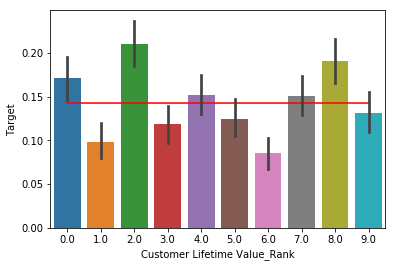

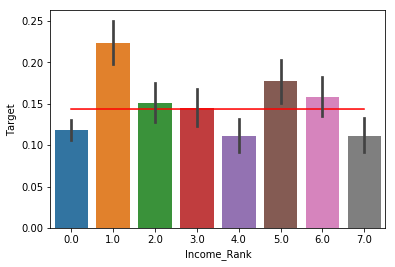

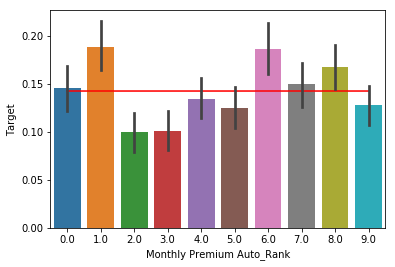

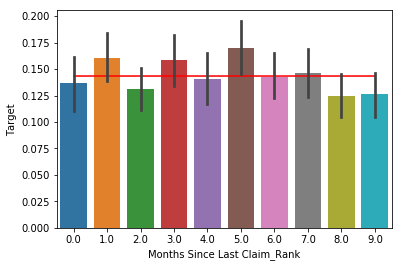

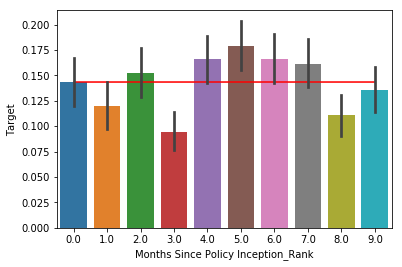

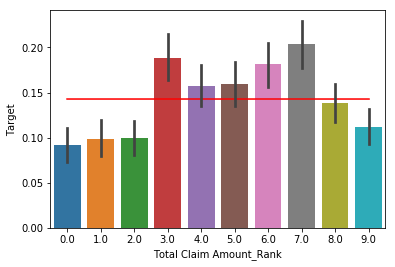

In [34]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_bin_combined['Target'].mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y="Target",data=X_bin_combined, estimator=mean )
plt.show()

In [35]:
num_1.dtypes

Customer Lifetime Value          float64
Income                           float64
Monthly Premium Auto             float64
Months Since Last Claim          float64
Months Since Policy Inception    float64
Total Claim Amount               float64
dtype: object

# Part 3 - Select K Best

In [36]:
# We are not performing this step since we are selecting all the features

In [37]:
select_features_df_num=num_1

# Feature Selection - Categorical Features 

# Part 1 - Bi Variate Analysis

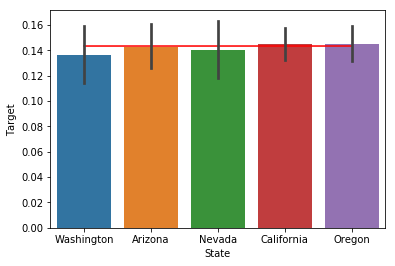

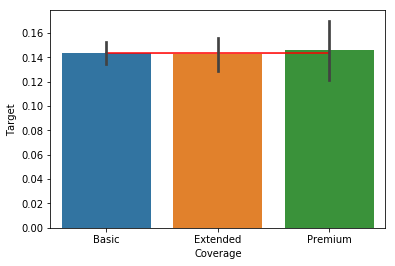

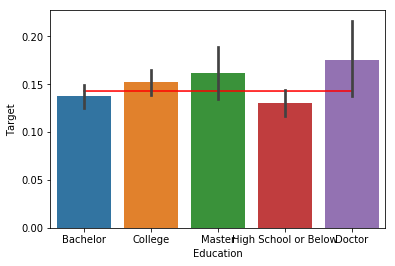

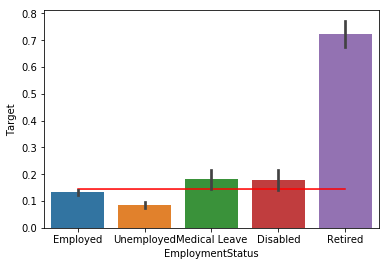

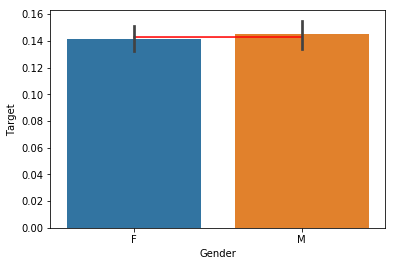

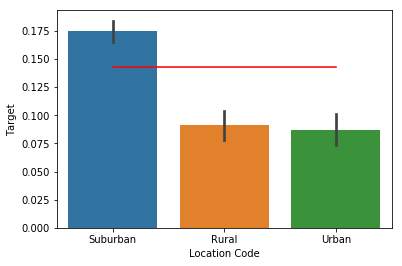

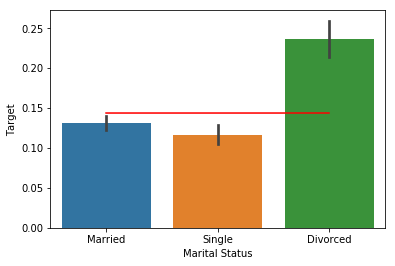

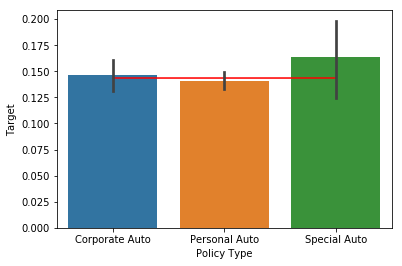

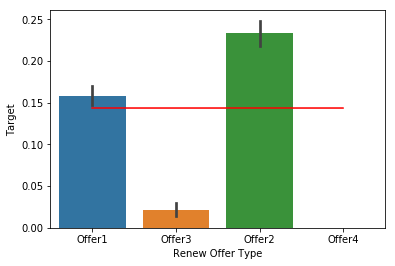

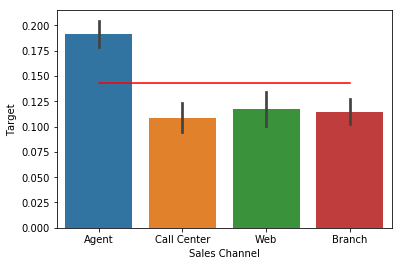

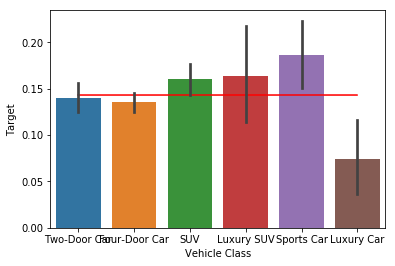

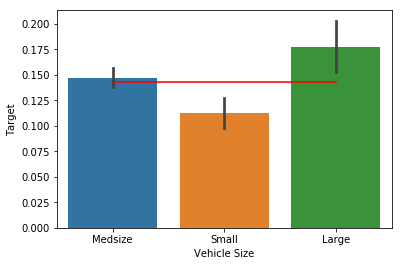

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char,ind],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_char_merged['Target'].mean(),data=X_char_merged,color='red')
    sns.barplot(x=col, y="Target",data=X_char_merged, estimator=mean )
plt.show()

In [39]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(9134, 34)

# Part 2 - Select K Best

In [40]:
# We are not perfroming this step as we are choosing all the features 

In [41]:
select_features_df_char=X_char_dum

# Creating the Master Feature Set for Model Development

In [42]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

In [43]:
Y['Target'].value_counts()

0    7826
1    1308
Name: Target, dtype: int64

# Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=42)

In [45]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (6393, 40)
Shape of Testing Data (2741, 40)
Response Rate in Training Data Target    0.140623
dtype: float64
Response Rate in Testing Data Target    0.149216
dtype: float64


In [46]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Ensemble Methods - Random Forest (With Bagging)
# Ensemble Methods - GBM/XGBoost (Boosting)

In [47]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [48]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,State_California,-5.321056e-04
1,State_Nevada,-1.191792e-04
2,State_Oregon,-4.077840e-04
3,State_Washington,-1.705378e-04
4,Coverage_Extended,2.079398e-04
5,Coverage_Premium,2.689585e-04
6,Education_College,-3.608772e-04
7,Education_Doctor,8.247218e-05
8,Education_High School or Below,-8.923998e-04
9,Education_Master,-3.980245e-05


In [49]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [50]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [60, 80, 100, 120, 140] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 7, 'min_samples_split': 100}


In [51]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=7,min_samples_split=100)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=100, random_state=0)

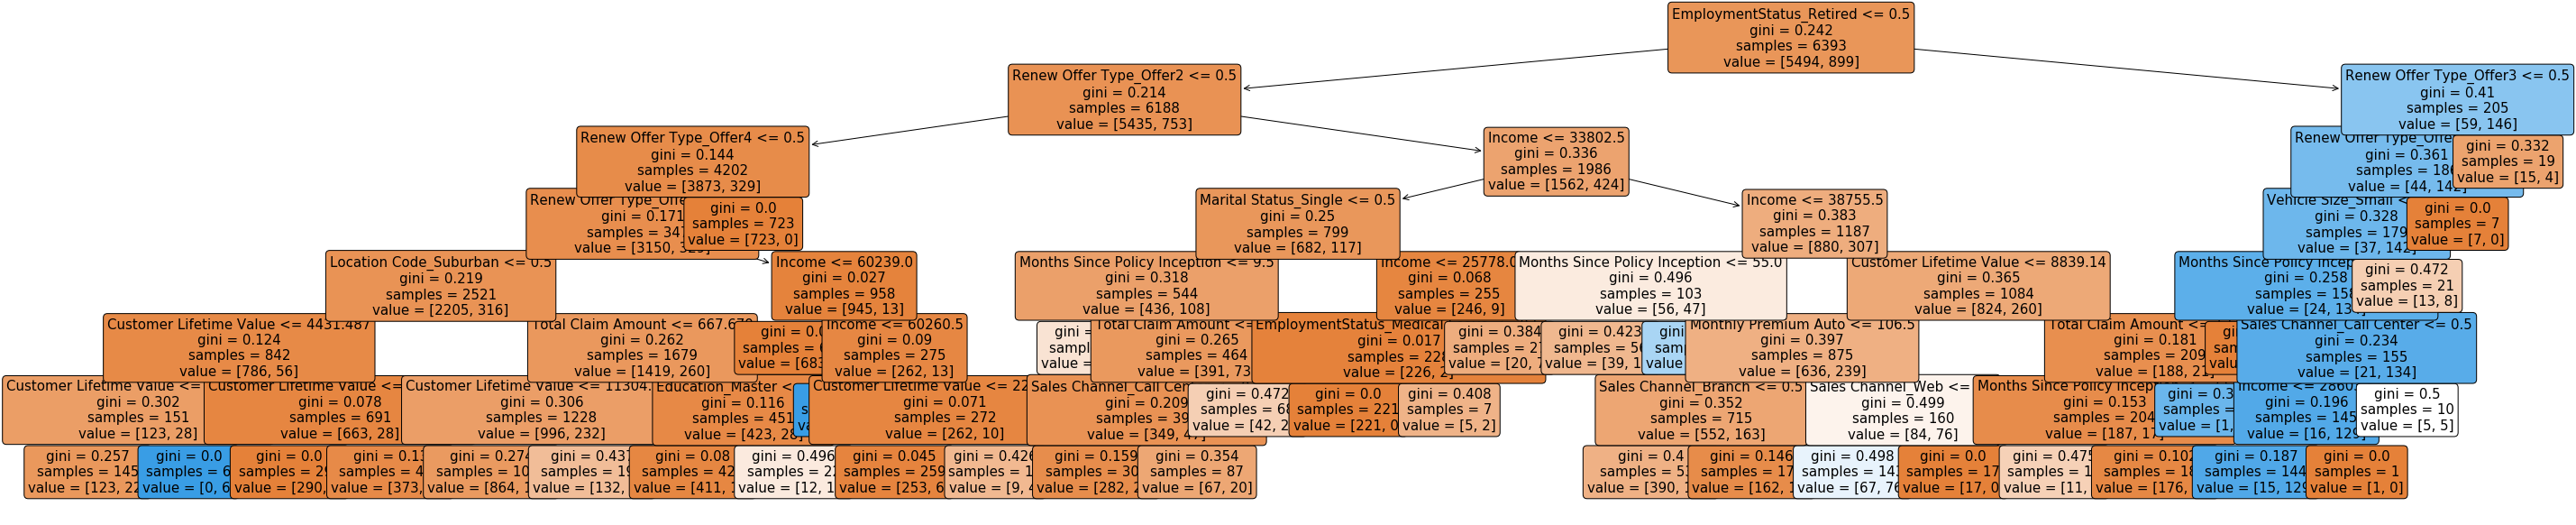

In [52]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

In [53]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=7,min_samples_split=100)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=100, random_state=0)

In [54]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
EmploymentStatus_Retired,0.313434
Renew Offer Type_Offer2,0.082677
Income,0.069513
Renew Offer Type_Offer3,0.062178
Renew Offer Type_Offer4,0.059509
Customer Lifetime Value,0.057228
Total Claim Amount,0.051844
Months Since Policy Inception,0.038551
Monthly Premium Auto,0.035626
Location Code_Suburban,0.027543


In [55]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=7,min_samples_split=100)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=7, min_samples_split=100,
                           random_state=0)

In [56]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Customer Lifetime Value,0.170358
EmploymentStatus_Retired,0.131859
Income,0.126478
Total Claim Amount,0.107366
Months Since Policy Inception,0.095660
Monthly Premium Auto,0.070588
Renew Offer Type_Offer2,0.055711
Months Since Last Claim,0.053509
Renew Offer Type_Offer3,0.029450
Renew Offer Type_Offer4,0.018303


In [72]:
# Model Evaluation on training data
y_pred_logreg_train=logreg.predict(X_train)
y_pred_tree_train=dtree.predict(X_train)
y_pred_rf_train=rf.predict(X_train)
y_pred_gbm_train=gbm.predict(X_train)

In [57]:
# Model Evaluation on test data
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [58]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [59]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.8507843852608536
Precision 0.0
Recall 0.0
f1_score 0.0


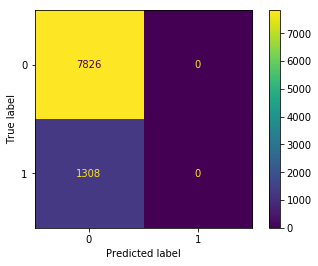

In [60]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [75]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.8708500547245531
Precision 0.6896551724137931
Recall 0.24449877750611246
f1_score 0.36101083032490977


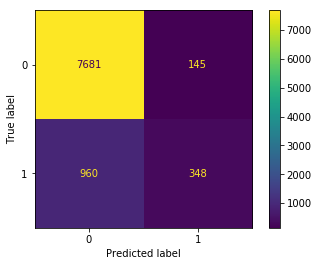

In [62]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [63]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.8675665815395841
Precision 0.8285714285714286
Recall 0.14180929095354522
f1_score 0.24217118997912315


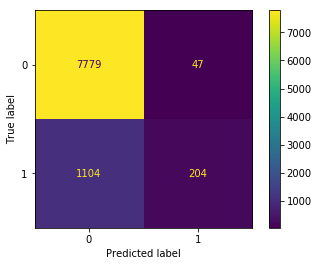

In [64]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [80]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.9730025538124772
Precision 0.9490616621983914
Recall 0.8655256723716381
f1_score 0.9053708439897699


# Check for Model Performance Consistency

In [81]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_gbm_train))
print("Precision",metrics.precision_score(y_train,y_pred_gbm_train))
print("Recall",metrics.recall_score(y_train,y_pred_gbm_train))
print("f1_score",metrics.f1_score(y_train,y_pred_gbm_train))

Accuracy: 0.9960894728609416
Precision 0.994343891402715
Recall 0.9777530589543938
f1_score 0.9859786876051599


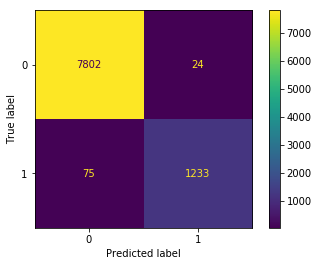

In [66]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [67]:
# Lorenz Curve

In [68]:
# Decsion Tree Lorenz Curve

In [69]:
# Random Forest Lorenz Curve

In [82]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_GBM')['Target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actutal_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Lift_over_Avg']=sorted_reindexed['Actutal_event_rate']/(max(sorted_reindexed['N_events'].cumsum())/max(sorted_reindexed['count'].cumsum()))
sorted_reindexed

,P_Rank_GBM,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile,Lift_over_Avg
0,10,914,0.992341,0.814546,907.0,907.0,0.693425,0.693425,7.0,7.0,0.000894,0.000894,0.6925,0.100066,0.100066,1,6.929699
1,9,913,0.432640,0.374838,395.0,1302.0,0.301988,0.995413,518.0,525.0,0.066190,0.067084,0.9283,0.099956,0.200022,2,3.021201
2,8,913,0.006572,0.095741,6.0,1308.0,0.004587,1.000000,907.0,1432.0,0.115896,0.182980,0.8170,0.099956,0.299978,3,0.045892
3,7,914,0.000000,0.052991,0.0,1308.0,0.000000,1.000000,914.0,2346.0,0.116790,0.299770,0.7002,0.100066,0.400044,4,0.000000
4,6,913,0.000000,0.032919,0.0,1308.0,0.000000,1.000000,913.0,3259.0,0.116662,0.416432,0.5836,0.099956,0.500000,5,0.000000
5,5,913,0.000000,0.020764,0.0,1308.0,0.000000,1.000000,913.0,4172.0,0.116662,0.533095,0.4669,0.099956,0.599956,6,0.000000
6,4,914,0.000000,0.013050,0.0,1308.0,0.000000,1.000000,914.0,5086.0,0.116790,0.649885,0.3501,0.100066,0.700022,7,0.000000
7,3,913,0.000000,0.007931,0.0,1308.0,0.000000,1.000000,913.0,5999.0,0.116662,0.766547,0.2335,0.099956,0.799978,8,0.000000
8,2,913,0.000000,0.004500,0.0,1308.0,0.000000,1.000000,913.0,6912.0,0.116662,0.883210,0.1168,0.099956,0.899934,9,0.000000
9,1,914,0.000000,0.002046,0.0,1308.0,0.000000,1.000000,914.0,7826.0,0.116790,1.000000,-0.0000,0.100066,1.000000,10,0.000000


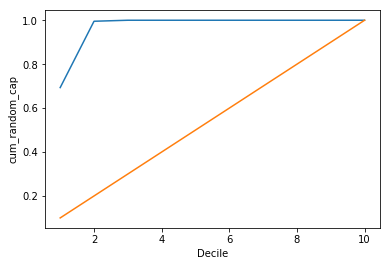

In [84]:
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed)

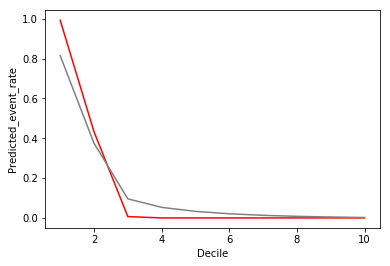

In [85]:
ax = sns.lineplot( x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="Predicted_event_rate", data=sorted_reindexed,color='grey')

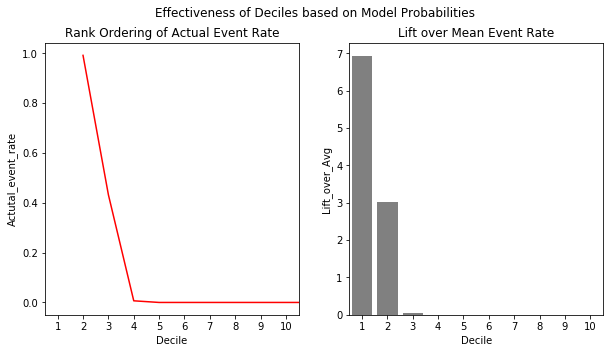

In [86]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.suptitle('Effectiveness of Deciles based on Model Probabilities')
axes[0].set_title('Rank Ordering of Actual Event Rate')
axes[1].set_title('Lift over Mean Event Rate')
sns.lineplot(ax=axes[0],  x="Decile", y="Actutal_event_rate", data=sorted_reindexed,color='red')
sns.barplot(ax=axes[1],  x="Decile", y="Lift_over_Avg", data=sorted_reindexed,color='grey')

In [74]:
# Project Conclusion :- 
# The GBM Model has performed the best and will be used for Customer targeting with Loan offers
# Since Monthly Income and Existing EMI are the most important features for the GBM model
# We will build a Business Value Metric based on Existing EMI/Monthly Income
# Low Values of this ratio will indicate valueable customers
# Within the High Value group, we can leverage the model to identify the best targets

In [87]:
df['Claim_RANK']=pd.qcut(df['Total Claim Amount'].rank(method='first').values,10,duplicates='drop').codes+1

In [88]:
df.groupby('Claim_RANK')['Total Claim Amount'].max()

Claim_RANK
1      104.068430
2      212.455137
3      302.400000
4      334.015169
5      383.890867
6      453.600000
7      513.600000
8      599.000883
9      773.346065
10    2893.239678
Name: Total Claim Amount, dtype: float64

In [89]:
df['Total Claim Amount'].mean()

434.0887943128942

In [91]:
df['Claim_RANK_SEGMENT']=np.where(df['Claim_RANK']<=6,"Low",(np.where(df['Claim_RANK']>=9,"High","Mid")))
df.Claim_RANK_SEGMENT.value_counts()

Low     5480
Mid     1827
High    1827
Name: Claim_RANK_SEGMENT, dtype: int64

In [92]:
df['Predicted_Renewal_Rank']=np.where(df['P_Rank_GBM']<=8,"Bottom8","Top2")
df['Predicted_Renewal_Rank'].value_counts()

Bottom8    7307
Top2       1827
Name: Predicted_Renewal_Rank, dtype: int64

In [105]:
pd.crosstab(index=df['Claim_RANK_SEGMENT'], columns=df['Predicted_Renewal_Rank'],values=df['Target'],aggfunc='mean')

Predicted_Renewal_Rank,Bottom8,Top2
Claim_RANK_SEGMENT,,
High,0.000000,0.765101
Low,0.001337,0.726539
Mid,0.000000,0.657993


In [100]:
x_chk1=df.loc[df['Predicted_Renewal_Rank']=='Top2']

In [103]:
x_chk2=df.loc[df['Predicted_Renewal_Rank']=='Bottom8']

In [107]:
pd.crosstab(index=x_chk1['Renew Offer Type'], columns=x_chk1['Policy Type'],values=x_chk1['Target'],aggfunc='mean')

Policy Type,Corporate Auto,Personal Auto,Special Auto
Renew Offer Type,,,
Offer1,0.738095,0.744932,0.696970
Offer2,0.746411,0.662180,0.734694
Offer3,1.000000,0.954545,1.000000
Offer4,NaN,0.000000,NaN


In [108]:
pd.crosstab(index=x_chk1['Renew Offer Type'], columns=x_chk1['Policy Type'],values=x_chk1['Target'],aggfunc='count')

Policy Type,Corporate Auto,Personal Auto,Special Auto
Renew Offer Type,,,
Offer1,168.0,592.0,33.0
Offer2,209.0,743.0,49.0
Offer3,6.0,22.0,3.0
Offer4,NaN,2.0,NaN
